In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
df = pd.read_csv('Downloads/drug200 (1).csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
## There are no null values in the dataset hence we move ahead with the data visualisation.

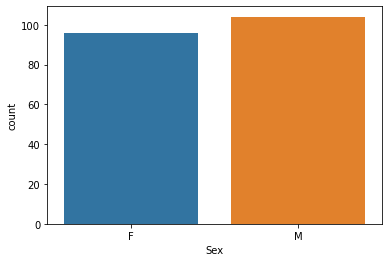

In [12]:
sns.countplot(x = df.Sex)
plt.show()

In [15]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

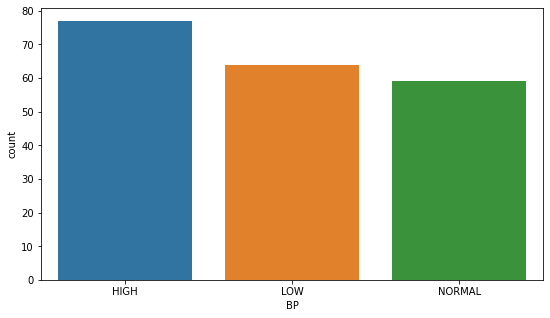

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(x=df.BP)
plt.show()

In [20]:
df_cat = df.select_dtypes(include = 'O')

In [21]:
for i in df_cat.columns:
    print(df[i].value_counts())

M    104
F     96
Name: Sex, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


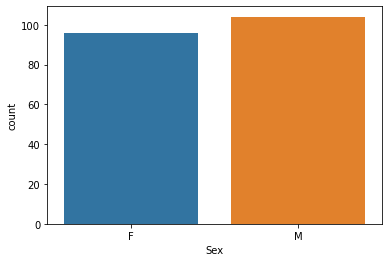

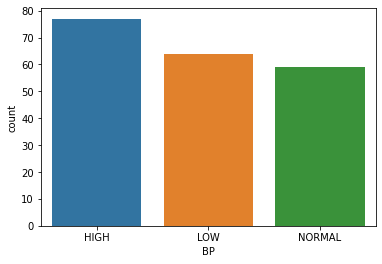

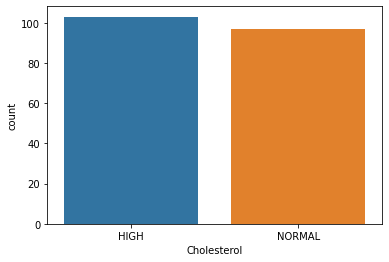

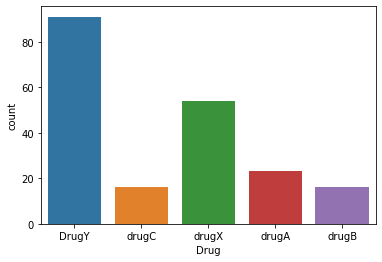

In [22]:
for i in df_cat.columns:
    sns.countplot(x = df[i])
    plt.show()

In [23]:
df_num = df.select_dtypes(include = ['int64', 'float64'])

C:\Users\Pilot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


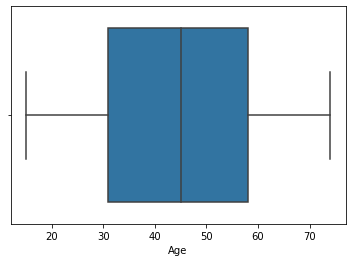

C:\Users\Pilot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


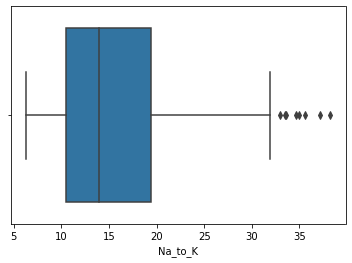

In [24]:
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

C:\Users\Pilot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


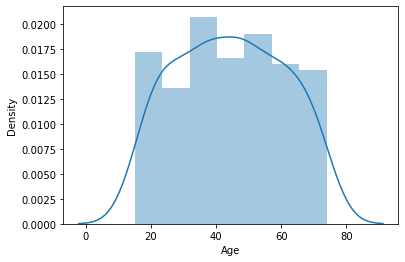

C:\Users\Pilot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


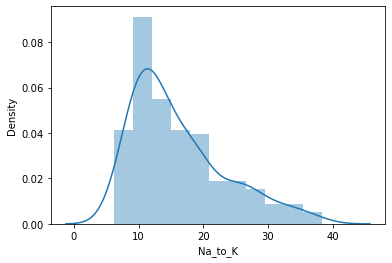

In [25]:
for i in df_num.columns:
    sns.distplot(df[i])
    plt.show()

In [26]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


In [27]:
## Basic Data Analysis :
## Age -- Drug
## Sex -- Drug
## BP -- Drug
## Cholesterol -- Drug

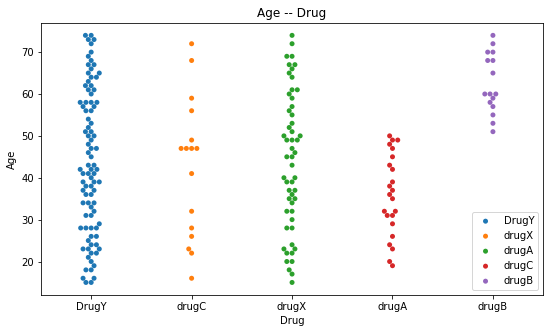

In [30]:
plt.figure(figsize=(9,5))
sns.swarmplot(x = 'Drug', y = 'Age', data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [33]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())
print("Minimum Age of DrugC",df.Age[df.Drug == "drugC"].min())
print("Maximum Age of DrugX",df.Age[df.Drug == "drugX"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50
Minimum Age of DrugC 16
Maximum Age of DrugX 74


In [36]:
df_Sex_Drug = df.groupby(['Drug', 'Sex']).size().reset_index(name='count')
df_Sex_Drug

,Drug,Sex,count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


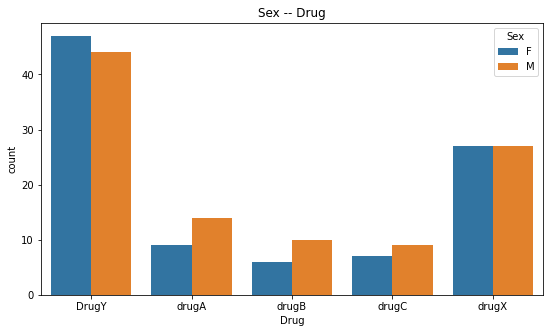

In [42]:
plt.figure(figsize=(9,5))
sns.barplot(x = "Drug",y="count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

Male people get drugA, drugB and drugC more than male people.

Female people get DrugY more than female people.

drugX seems equal for male and female people.

According to this graph, Sex feature is not an important feature for classification.

BP -- Drug

In [43]:
df_BP_Drug = df.groupby(['Drug', 'BP']).size().reset_index(name='count')
df_BP_Drug

,Drug,BP,count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


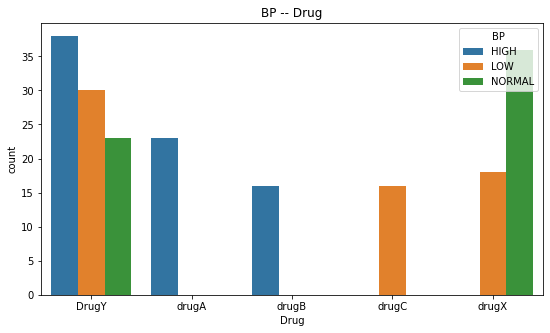

In [45]:
plt.figure(figsize=(9,5))
sns.barplot(x = "Drug",y="count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

drugA and drugB are got only by people who have HIGH blood pressure.

drugC is got by people who have LOW blood pressure.

drugX is got by people who have HIGH blood pressure.

BP is an important feature for classification.

### Na_to_K -- Drug

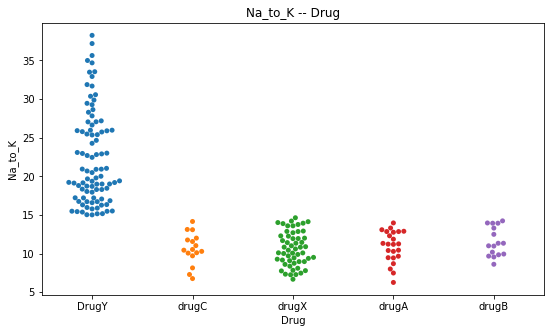

In [46]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [47]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())


Minimum Na_to_K for DrugY: 15.015


### Cholesterol -- Drug

In [48]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


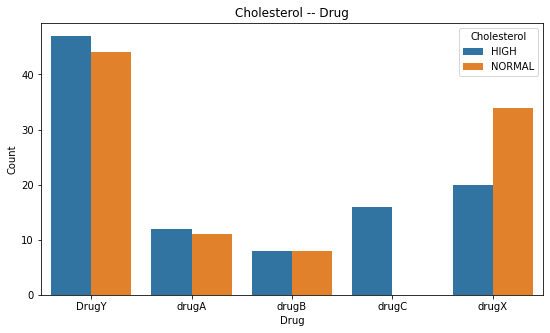

In [49]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

In [50]:
df['Na_to_k_bigger_than_15'] = [1 if i > 15.015 else 0 for i in df.Na_to_K]

In [51]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_k_bigger_than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0
196,16,M,LOW,HIGH,12.006,drugC,0
197,52,M,NORMAL,HIGH,9.894,drugX,0
198,23,M,NORMAL,NORMAL,14.020,drugX,0


In [53]:
df_NaK15 = df.groupby(["Drug","Na_to_k_bigger_than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_k_bigger_than_15,Count
0,DrugY,0,1
1,DrugY,1,90
2,drugA,0,23
3,drugB,0,16
4,drugC,0,16
5,drugX,0,54


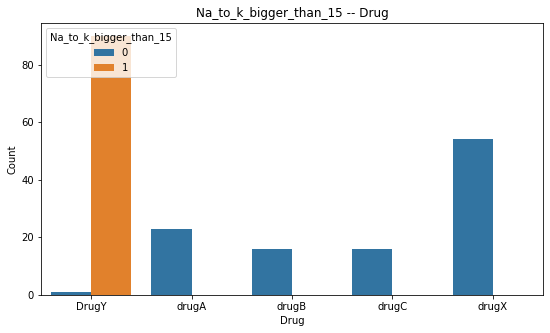

In [56]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_k_bigger_than_15",data = df_NaK15)
plt.title("Na_to_k_bigger_than_15 -- Drug")
plt.show()

### Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [62]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_k_bigger_than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [63]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_k_bigger_than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1
...,...,...,...,...,...,...,...
195,56,0,1,0,69,3,0
196,16,1,1,0,75,3,0
197,52,1,2,0,36,4,0
198,23,1,2,1,102,4,0


### Train_Test_Split

In [64]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

Data was splitted as 80% train data and 20% test data.

### Model Building

In [65]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Knn Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.59375
Test Score: 0.65


In [68]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

#### Using gridSearchCv

In [69]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 0.7625
Test Score: 0.7


In [70]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.975
Test Score: 0.975


In [72]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

In [73]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

Hyperparameters: {'criterion': 'gini', 'n_estimators': 700}
Train Score: 0.98125
Test Score: 0.975


In [74]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(x_test,y_test)

### SVM

In [75]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.7125
Test Score: 0.65


In [76]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

In [77]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))


Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9875
Test Score: 0.975


In [78]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

## Conclusion

In [79]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.59375
KNN GridSearch Train Score,0.76250
Random Forest Default Train Score,0.97500
Random Forest GridSearch Train Score,0.98125
SVM Default Train Score,0.71250
SVM GridSearch Train Score,0.98750


In [80]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.650
KNN GridSearch Test Score,0.700
Random Forest Default Test Score,0.975
Random Forest GridSearch Test Score,0.975
SVM Default Test Score,0.650
SVM GridSearch Test Score,0.975


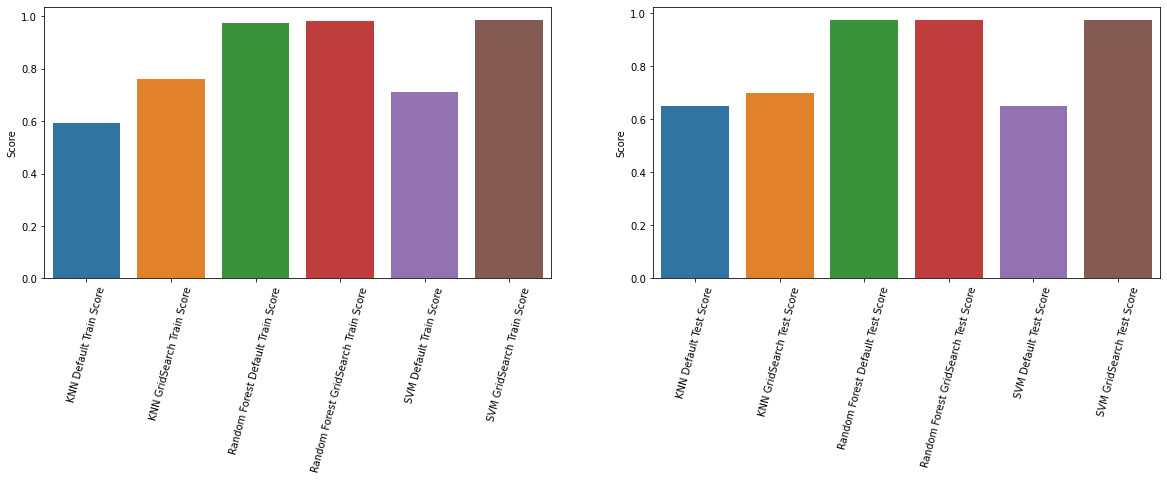

In [83]:

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

Random Forest classifier and SVM classifier (after hyperparameter tuning) have a good scores.

KNN classifier has worst score in three clasifiers.